# Kobe Career Shots EDA
**Author: Ganesh Morye**

##  Load packages and data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (FuncFormatter, MultipleLocator, FixedLocator)
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import re
pd.set_option('display.max_rows', 50)


## Functions

In [13]:
#functions to format all the figures in consistent manner
font = 'Cambria'
dpi=150
def format_fig(fig, flag='NotTimeSeries', grid = 'NotFacetGrid'):
    fig.set_dpi(dpi)
    if grid == 'NotFacetGrid':
        fig.suptitle(fig._suptitle.get_text(), fontsize=12, fontweight = 'extra bold', 
                     fontfamily = font, color = 'ghostwhite')
        fig.set_facecolor('#00283b')
    elif grid == 'FacetGrid':
        fig.fig.suptitle(fig.fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = font, color = 'ghostwhite')
        fig.fig.set_facecolor('#00283b')
    else:
        pass

    #loop through all the axes in the figure
    for ax in fig.axes:
        #ax = ax.get_shared_x_axes().get_siblings(ax)[1] #primary axis location
        ax.grid(False)
        ax.set_facecolor('#00283b')
        ax.tick_params(axis='both', which='both', labelsize=8, labelcolor = 'ghostwhite', color='ghostwhite')
        if flag == 'NotTimeSeries':
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag == 'TimeSeries':
            axPrimary = ax.get_shared_x_axes().get_siblings(ax)[1]
            axPrimary.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag =='NoFormatting':
            pass
        else:
            pass

        ax.xaxis.get_label().set_fontname(font)
        ax.xaxis.get_label().set_fontsize(8)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname(font)
        ax.yaxis.get_label().set_fontsize(8)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=12, fontweight = 'extra bold', fontfamily = font, color = 'ghostwhite')

In [14]:
nba_teams = {'ATL'	:	'Atlanta Hawks',
'BKN'	:	'Brooklyn Nets',
'BOS'	:	'Boston Celtics',
'CHA'	:	'Charlotte Hornets',
'CHI'	:	'Chicago Bulls',
'CLE'	:	'Cleveland Cavaliers',
'DAL'	:	'Dallas Mavericks',
'DEN'	:	'Denver Nuggets',
'DET'	:	'Detroit Pistons',
'GSW'	:	'Golden State Warriors',
'HOU'	:	'Houston Rockets',
'IND'	:	'Indiana Pacers',
'LAC'	:	'Los Angeles Clippers',
'LAL'	:	'Los Angeles Lakers',
'MEM'	:	'Memphis Grizzlies',
'MIA'	:	'Miami Heat',
'MIL'	:	'Milwaukee Bucks',
'MIN'	:	'Minnesota Timberwolves',
'NJN'  :   'New Jersey Nets',
'NOH'   :   'New Orleans Hornets',
'NOP'	:	'New Orleans Pelicans',
'NYK'	:	'New York Knicks',
'OKC'	:	'Oklahoma City Thunder',
'ORL'	:	'Orlando Magic',
'PHI'	:	'Philadelphia 76ers',
'PHX'	:	'Phoenix Suns',
'POR'	:	'Portland Trail Blazers',
'SAC'	:	'Sacramento Kings',
'SAS'	:	'San Antonio Spurs',
'SEA'   :   'Seattle SuperSonics',
'TOR'	:	'Toronto Raptors',
'UTA'	:	'Utah Jazz',
'VAN'   :   'Vancouver Grizzlies',
'WAS'	:	'Washington Wizards'}


In [15]:
df = pd.read_csv('../data/kobe_superwide_games.csv')
df.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [62]:
df.shape

(1558, 645)

## EDA

In [16]:
#checking to make sure the index is a range
df.index

RangeIndex(start=0, stop=1558, step=1)

In [17]:
# investigating the  column names to inform about the data
cols = list(df.columns)
cols

['SHOTS_MADE',
 'AWAY_GAME',
 'SEASON_OPPONENT:atl:1996-97',
 'SEASON_OPPONENT:atl:1997-98',
 'SEASON_OPPONENT:atl:1999-00',
 'SEASON_OPPONENT:atl:2000-01',
 'SEASON_OPPONENT:atl:2001-02',
 'SEASON_OPPONENT:atl:2002-03',
 'SEASON_OPPONENT:atl:2003-04',
 'SEASON_OPPONENT:atl:2004-05',
 'SEASON_OPPONENT:atl:2005-06',
 'SEASON_OPPONENT:atl:2006-07',
 'SEASON_OPPONENT:atl:2007-08',
 'SEASON_OPPONENT:atl:2008-09',
 'SEASON_OPPONENT:atl:2009-10',
 'SEASON_OPPONENT:atl:2010-11',
 'SEASON_OPPONENT:atl:2011-12',
 'SEASON_OPPONENT:atl:2012-13',
 'SEASON_OPPONENT:atl:2013-14',
 'SEASON_OPPONENT:atl:2014-15',
 'SEASON_OPPONENT:atl:2015-16',
 'SEASON_OPPONENT:bkn:2012-13',
 'SEASON_OPPONENT:bkn:2015-16',
 'SEASON_OPPONENT:bos:1996-97',
 'SEASON_OPPONENT:bos:1997-98',
 'SEASON_OPPONENT:bos:1999-00',
 'SEASON_OPPONENT:bos:2001-02',
 'SEASON_OPPONENT:bos:2002-03',
 'SEASON_OPPONENT:bos:2003-04',
 'SEASON_OPPONENT:bos:2004-05',
 'SEASON_OPPONENT:bos:2005-06',
 'SEASON_OPPONENT:bos:2006-07',
 'SEASON_OP

### Rows represent the each game played by Kobe throughout his career and columns represent various attributes associated with those games such as opponents, season, type of shots made, etc

## Using regular expression to split the column names and extract the categories of data

In [18]:
cols_dict = dict()
for col in cols:
    m = re.search(r'([a-zA-Z0-9_-]+)\:?([a-zA-Z0-9_-]*)?\:?([a-zA-Z0-9_-]*)?', col)
    if m.group(1) not in cols_dict:
        cols_dict[m.group(1)] = {m.group(2) : [m.group(3)]}
    elif m.group(2) not in cols_dict[m.group(1)]:
        cols_dict[m.group(1)][m.group(2)] = [m.group(3)]
    else:
        cols_dict[m.group(1)][m.group(2)].append(m.group(3))

In [19]:
print(f'The dataset provides game data for Kobe Bryant in the following main categories {list(cols_dict.keys())}')

The dataset provides game data for Kobe Bryant in the following main categories ['SHOTS_MADE', 'AWAY_GAME', 'SEASON_OPPONENT', 'SEASON', 'MONTH', 'PLAYOFFS', 'MEAN_X_POSITION', 'MEAN_Y_POSITION', 'MEAN_SHOT_DISTANCE', 'MEAN_SHOT_ANGLE', 'SHOT_ZONE_RANGE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_TYPE', 'COMBINED_SHOT_TYPE', 'SECONDS_REMAINING', 'MINUTES_REMAINING', 'PERIOD', 'ACTION_TYPE', 'SEASON_GAME_NUMBER', 'CAREER_GAME_NUMBER']


In [20]:
print (f'There are some categories for which additional data is available such as:\n')
for key, value in cols_dict.items():
    if len(list(cols_dict[key].keys())) > 1:
        print(f'There are {len(list(cols_dict[key].keys()))} entries associated with {key} and they are:\n{list(cols_dict[key].keys())}\n')
        #print(key, list(cols_dict[key].keys()), len(list(cols_dict[key].keys())))


There are some categories for which additional data is available such as:

There are 33 entries associated with SEASON_OPPONENT and they are:
['atl', 'bkn', 'bos', 'cha', 'chi', 'cle', 'dal', 'den', 'det', 'gsw', 'hou', 'ind', 'lac', 'mem', 'mia', 'mil', 'min', 'njn', 'noh', 'nop', 'nyk', 'okc', 'orl', 'phi', 'phx', 'por', 'sac', 'sas', 'sea', 'tor', 'uta', 'van', 'was']

There are 20 entries associated with SEASON and they are:
['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']

There are 5 entries associated with SHOT_ZONE_RANGE and they are:
['16-24_ft', '24', '8-16_ft', 'back_court_shot', 'less_than_8_ft']

There are 7 entries associated with SHOT_ZONE_BASIC and they are:
['above_the_break_3', 'backcourt', 'in_the_paint_', 'left_corner_3', 'mid-range', 'restricted_area', 'right_corner_3']

There are 6 entries assoc

In [21]:
df_season_opponent = pd.DataFrame(index=((list(cols_dict['SEASON_OPPONENT'].keys()))),
                                            columns = list(cols_dict['SEASON'].keys()))

In [22]:

print(f'SEASON_OPPONENT data has city and season data\n')
for key, value in cols_dict.items():
    if len(list(cols_dict[key].keys())) > 1:
        #print(f'{key}')
        #print(f'{key}')
        for keyx, valuex in cols_dict[key].items():
            if len(valuex) > 1:
                print(f'{key}:-{keyx} - {valuex}')
                df_season_opponent.loc[keyx,:] = [1  if x in  valuex else np.NAN for x in list(df_season_opponent.columns)]


SEASON_OPPONENT data has city and season data

SEASON_OPPONENT:-atl - ['1996-97', '1997-98', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']
SEASON_OPPONENT:-bkn - ['2012-13', '2015-16']
SEASON_OPPONENT:-bos - ['1996-97', '1997-98', '1999-00', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2014-15', '2015-16']
SEASON_OPPONENT:-cha - ['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']
SEASON_OPPONENT:-chi - ['1996-97', '1997-98', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2015-16']
SEASON_OPPONENT:-cle - ['1996-

In [23]:
#mapping NBA team name acronymns to the full team name
df_season_opponent.index = [nba_teams[val.upper()] for val in df_season_opponent.index]

In [24]:
#null values represent non-appearance
df_season_opponent

,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
Atlanta Hawks,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
Boston Celtics,1,1,NaN,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1
Charlotte Hornets,1,1,1,1,1,1,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1
Chicago Bulls,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,1
Cleveland Cavaliers,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1
Dallas Mavericks,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1
Denver Nuggets,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1
Detroit Pistons,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1
Golden State Warriors,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1


In [63]:
df_season_opponent.shape

(33, 20)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


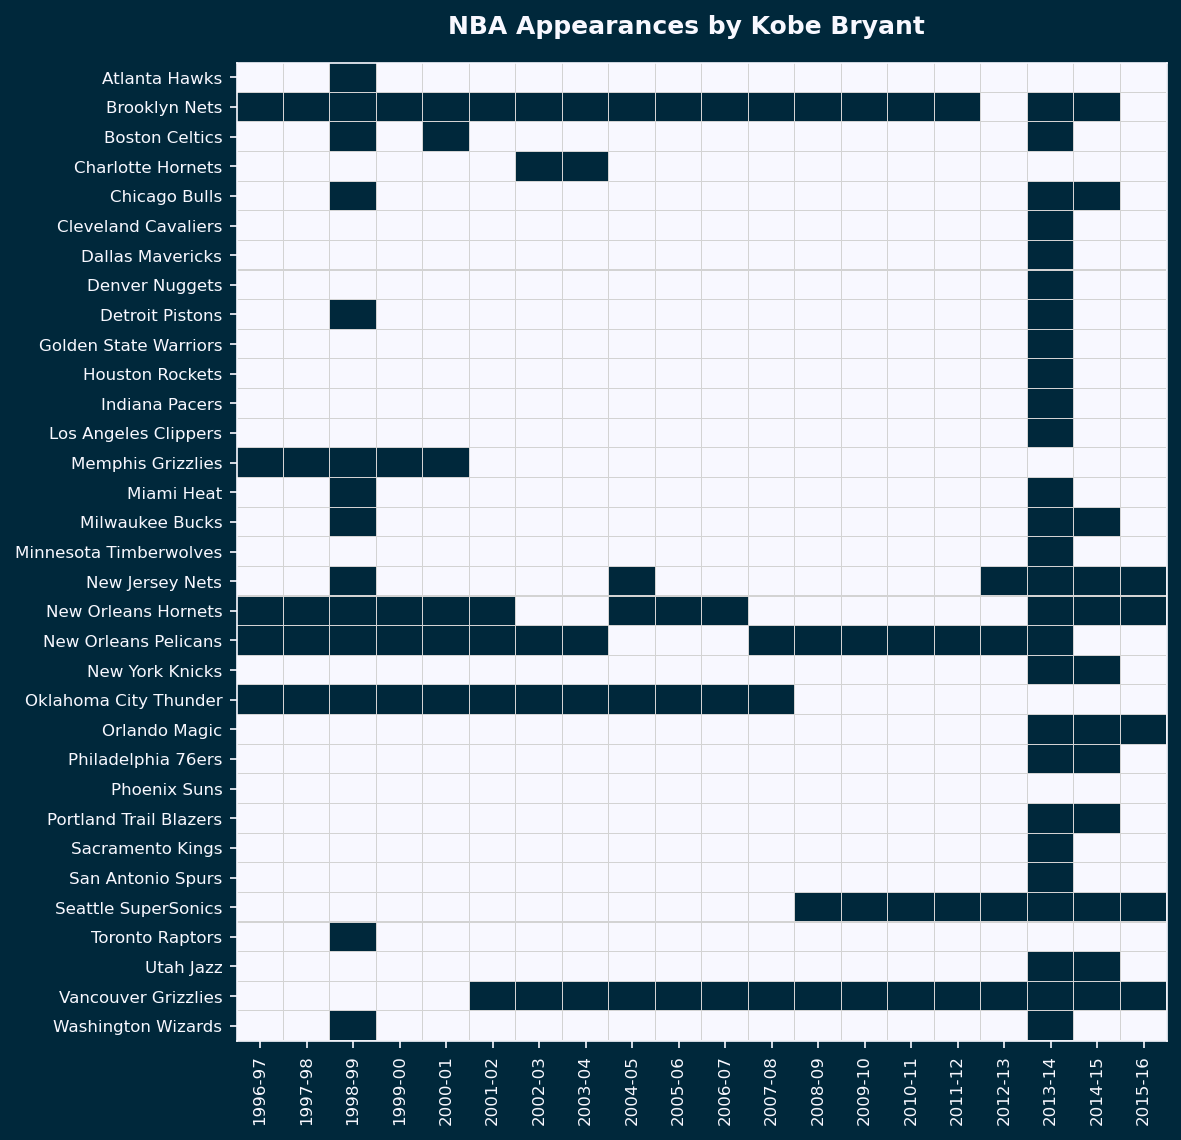

In [25]:
#white color represents-appearances and blue represent missed game
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.suptitle('NBA Appearances by Kobe Bryant')
sns.heatmap(df_season_opponent.isna(), cmap=['ghostwhite', '#00283b'], cbar=False, ax=ax, linewidths=0.01, linecolor='lightgray')
format_fig(fig, "NoFormatting")
plt.subplots_adjust(top=0.94)
fig.savefig('../imgs/NBA_Appearances_by_Kobe_Bryant.png', dpi=400, bbox_inches='tight')

In [26]:
## EDA to find out which CAREER_GAME_NUMBER is missing as it goes from 1 to 1559 and index goes from 0-1557
set1 = df.index
set2 = df['CAREER_GAME_NUMBER']
print(f'The records related to CAREER_GAME_NUMBER = {set1.difference(set2)[1]} are missing')

The records related to CAREER_GAME_NUMBER = 22 are missing


<AxesSubplot:ylabel='Frequency'>

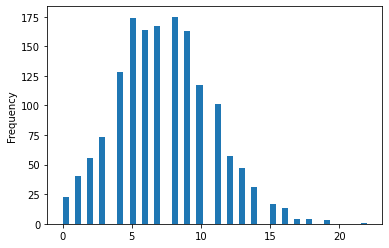

In [27]:
# A:
df['SHOTS_MADE'].plot.hist(bins=50)

In [28]:

mask_action_type = [x for x in df.columns if re.search('ACTION_TYPE', x)]
mask_action_type

['ACTION_TYPE:alley_oop_dunk_shot',
 'ACTION_TYPE:alley_oop_layup_shot',
 'ACTION_TYPE:cutting_finger_roll_layup_shot',
 'ACTION_TYPE:cutting_layup_shot',
 'ACTION_TYPE:driving_bank_shot',
 'ACTION_TYPE:driving_dunk_shot',
 'ACTION_TYPE:driving_finger_roll_layup_shot',
 'ACTION_TYPE:driving_finger_roll_shot',
 'ACTION_TYPE:driving_floating_bank_jump_shot',
 'ACTION_TYPE:driving_floating_jump_shot',
 'ACTION_TYPE:driving_hook_shot',
 'ACTION_TYPE:driving_jump_shot',
 'ACTION_TYPE:driving_layup_shot',
 'ACTION_TYPE:driving_reverse_layup_shot',
 'ACTION_TYPE:driving_slam_dunk_shot',
 'ACTION_TYPE:dunk_shot',
 'ACTION_TYPE:fadeaway_bank_shot',
 'ACTION_TYPE:fadeaway_jump_shot',
 'ACTION_TYPE:finger_roll_layup_shot',
 'ACTION_TYPE:finger_roll_shot',
 'ACTION_TYPE:floating_jump_shot',
 'ACTION_TYPE:follow_up_dunk_shot',
 'ACTION_TYPE:hook_bank_shot',
 'ACTION_TYPE:hook_shot',
 'ACTION_TYPE:jump_bank_shot',
 'ACTION_TYPE:jump_hook_shot',
 'ACTION_TYPE:jump_shot',
 'ACTION_TYPE:layup_shot',
 '

In [29]:
#sum across all ACTION_TYPES is 1. action_type is a ratio of each type of shot made

sum_action_type = df[mask_action_type].agg(np.sum, axis=1)
sum_action_type

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1553    1.0
1554    1.0
1555    1.0
1556    1.0
1557    1.0
Length: 1558, dtype: float64

In [30]:
action_type_number_shots = df[mask_action_type].multiply(df['SHOTS_MADE'], axis='index')
action_type_number_shots

,ACTION_TYPE:alley_oop_dunk_shot,ACTION_TYPE:alley_oop_layup_shot,ACTION_TYPE:cutting_finger_roll_layup_shot,ACTION_TYPE:cutting_layup_shot,ACTION_TYPE:driving_bank_shot,ACTION_TYPE:driving_dunk_shot,ACTION_TYPE:driving_finger_roll_layup_shot,ACTION_TYPE:driving_finger_roll_shot,ACTION_TYPE:driving_floating_bank_jump_shot,ACTION_TYPE:driving_floating_jump_shot,...,ACTION_TYPE:slam_dunk_shot,ACTION_TYPE:step_back_jump_shot,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.210526,...,0.0,0.210526,0.0,0.0,0.0,0.0,0.421053,0.0,0.000000,0.210526
1554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1555,0.0,0.0,0.0,0.409091,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.409091,0.0,0.409091,0.409091
1556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.000000


In [31]:
#sum different ACTION_TYPEs (does not make sense since they are fractions)
mask_season = [x for x in df.columns if re.search('SEASON:', x)]
df_season = df[mask_season]
df_season

,SEASON:1996-97,SEASON:1997-98,SEASON:1998-99,SEASON:1999-00,SEASON:2000-01,SEASON:2001-02,SEASON:2002-03,SEASON:2003-04,SEASON:2004-05,SEASON:2005-06,SEASON:2006-07,SEASON:2007-08,SEASON:2008-09,SEASON:2009-10,SEASON:2010-11,SEASON:2011-12,SEASON:2012-13,SEASON:2013-14,SEASON:2014-15,SEASON:2015-16
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
seasons_played = list(cols_dict['SEASON'].keys())
seasons_played

['1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16']

In [33]:
action_types = list(cols_dict['ACTION_TYPE'])
action_types

['alley_oop_dunk_shot',
 'alley_oop_layup_shot',
 'cutting_finger_roll_layup_shot',
 'cutting_layup_shot',
 'driving_bank_shot',
 'driving_dunk_shot',
 'driving_finger_roll_layup_shot',
 'driving_finger_roll_shot',
 'driving_floating_bank_jump_shot',
 'driving_floating_jump_shot',
 'driving_hook_shot',
 'driving_jump_shot',
 'driving_layup_shot',
 'driving_reverse_layup_shot',
 'driving_slam_dunk_shot',
 'dunk_shot',
 'fadeaway_bank_shot',
 'fadeaway_jump_shot',
 'finger_roll_layup_shot',
 'finger_roll_shot',
 'floating_jump_shot',
 'follow_up_dunk_shot',
 'hook_bank_shot',
 'hook_shot',
 'jump_bank_shot',
 'jump_hook_shot',
 'jump_shot',
 'layup_shot',
 'pullup_bank_shot',
 'pullup_jump_shot',
 'putback_dunk_shot',
 'putback_layup_shot',
 'putback_slam_dunk_shot',
 'reverse_dunk_shot',
 'reverse_layup_shot',
 'reverse_slam_dunk_shot',
 'running_bank_shot',
 'running_dunk_shot',
 'running_finger_roll_layup_shot',
 'running_finger_roll_shot',
 'running_hook_shot',
 'running_jump_shot',


In [34]:
#creating empty dataframe of how many shots of a particular action types were made for each season kobe played
df_action_type_season = pd.DataFrame(index=seasons_played, columns=action_types)
df_action_type_season

,alley_oop_dunk_shot,alley_oop_layup_shot,cutting_finger_roll_layup_shot,cutting_layup_shot,driving_bank_shot,driving_dunk_shot,driving_finger_roll_layup_shot,driving_finger_roll_shot,driving_floating_bank_jump_shot,driving_floating_jump_shot,...,slam_dunk_shot,step_back_jump_shot,tip_layup_shot,tip_shot,turnaround_bank_shot,turnaround_fadeaway_bank_jump_shot,turnaround_fadeaway_shot,turnaround_finger_roll_shot,turnaround_hook_shot,turnaround_jump_shot
1996-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for season in seasons_played:
    mask = df[df['SEASON:'+season]==1].index
    df_action_type_season.loc[season,:] = list(action_type_number_shots.loc[mask, mask_action_type].agg(np.sum, axis=0))
df_action_type_season

,alley_oop_dunk_shot,alley_oop_layup_shot,cutting_finger_roll_layup_shot,cutting_layup_shot,driving_bank_shot,driving_dunk_shot,driving_finger_roll_layup_shot,driving_finger_roll_shot,driving_floating_bank_jump_shot,driving_floating_jump_shot,...,slam_dunk_shot,step_back_jump_shot,tip_layup_shot,tip_shot,turnaround_bank_shot,turnaround_fadeaway_bank_jump_shot,turnaround_fadeaway_shot,turnaround_finger_roll_shot,turnaround_hook_shot,turnaround_jump_shot
1996-97,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,5.147436,0.0,0.0,2.888278,0.0,0.0,0.0,0.0,0.0,0.0
1997-98,0.0,0.0,0.0,0.0,0.0,5.491776,0.0,0.0,0.0,0.0,...,22.405271,0.0,0.0,3.98308,0.0,0.0,0.0,0.0,0.0,0.0
1998-99,0.0,0.0,0.0,0.0,0.0,5.212283,0.0,0.0,0.0,0.0,...,15.517744,0.0,0.0,4.425085,0.0,0.0,0.0,0.0,0.0,0.0
1999-00,0.0,0.0,0.0,0.0,0.0,6.732603,0.0,0.0,0.0,0.0,...,24.632042,0.0,0.0,9.941167,0.0,0.0,0.0,0.0,0.0,0.0
2000-01,10.991644,4.872881,0.0,0.0,0.0,7.605189,0.0,3.322369,0.0,0.0,...,17.019064,0.0,0.0,6.376507,0.0,0.0,0.0,0.0,0.0,32.101577
2001-02,5.588515,4.201354,0.0,0.0,0.0,15.444604,0.0,4.301227,0.0,0.0,...,12.411975,0.0,0.0,11.335932,0.0,0.0,0.0,0.0,0.4375,41.962837
2002-03,5.1489,1.787103,0.0,0.0,0.0,12.915108,0.0,4.98402,0.0,0.0,...,18.789475,0.0,0.0,5.031101,0.0,0.0,0.0,0.0,0.0,28.972368
2003-04,0.87931,2.782408,0.0,0.0,0.0,7.743923,0.0,6.464697,0.0,0.0,...,9.171074,0.0,0.0,3.498737,0.0,0.0,0.0,0.321429,0.0,19.533963
2004-05,1.546196,1.224599,0.0,0.0,0.0,6.169589,0.0,4.438439,0.0,0.0,...,6.234806,0.0,0.0,0.695906,0.0,0.0,0.0,0.0,0.222222,14.665505
2005-06,2.988426,2.885877,0.0,0.0,0.0,5.633544,0.0,5.369392,0.0,0.0,...,9.032342,0.0,0.0,1.385287,0.0,0.0,0.0,0.25,0.0,35.180542


In [36]:
df_action_type_season_reshape = (df_action_type_season.rename_axis('season')
            .reset_index()
            .melt(id_vars=['season'], var_name='action_type'))


df_action_type_season_reshape

,season,action_type,value
0,1996-97,alley_oop_dunk_shot,0.0
1,1997-98,alley_oop_dunk_shot,0.0
2,1998-99,alley_oop_dunk_shot,0.0
3,1999-00,alley_oop_dunk_shot,0.0
4,2000-01,alley_oop_dunk_shot,10.991644
...,...,...,...
1135,2011-12,turnaround_jump_shot,24.587868
1136,2012-13,turnaround_jump_shot,16.754934
1137,2013-14,turnaround_jump_shot,0.0
1138,2014-15,turnaround_jump_shot,8.90197


In [64]:
df_action_type_season_reshape['action_type'].value_counts()

running_pull-up_jump_shot         20
reverse_layup_shot                20
driving_reverse_layup_shot        20
putback_layup_shot                20
pullup_bank_shot                  20
                                  ..
running_bank_shot                 20
follow_up_dunk_shot               20
running_finger_roll_layup_shot    20
finger_roll_shot                  20
turnaround_jump_shot              20
Name: action_type, Length: 57, dtype: int64

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


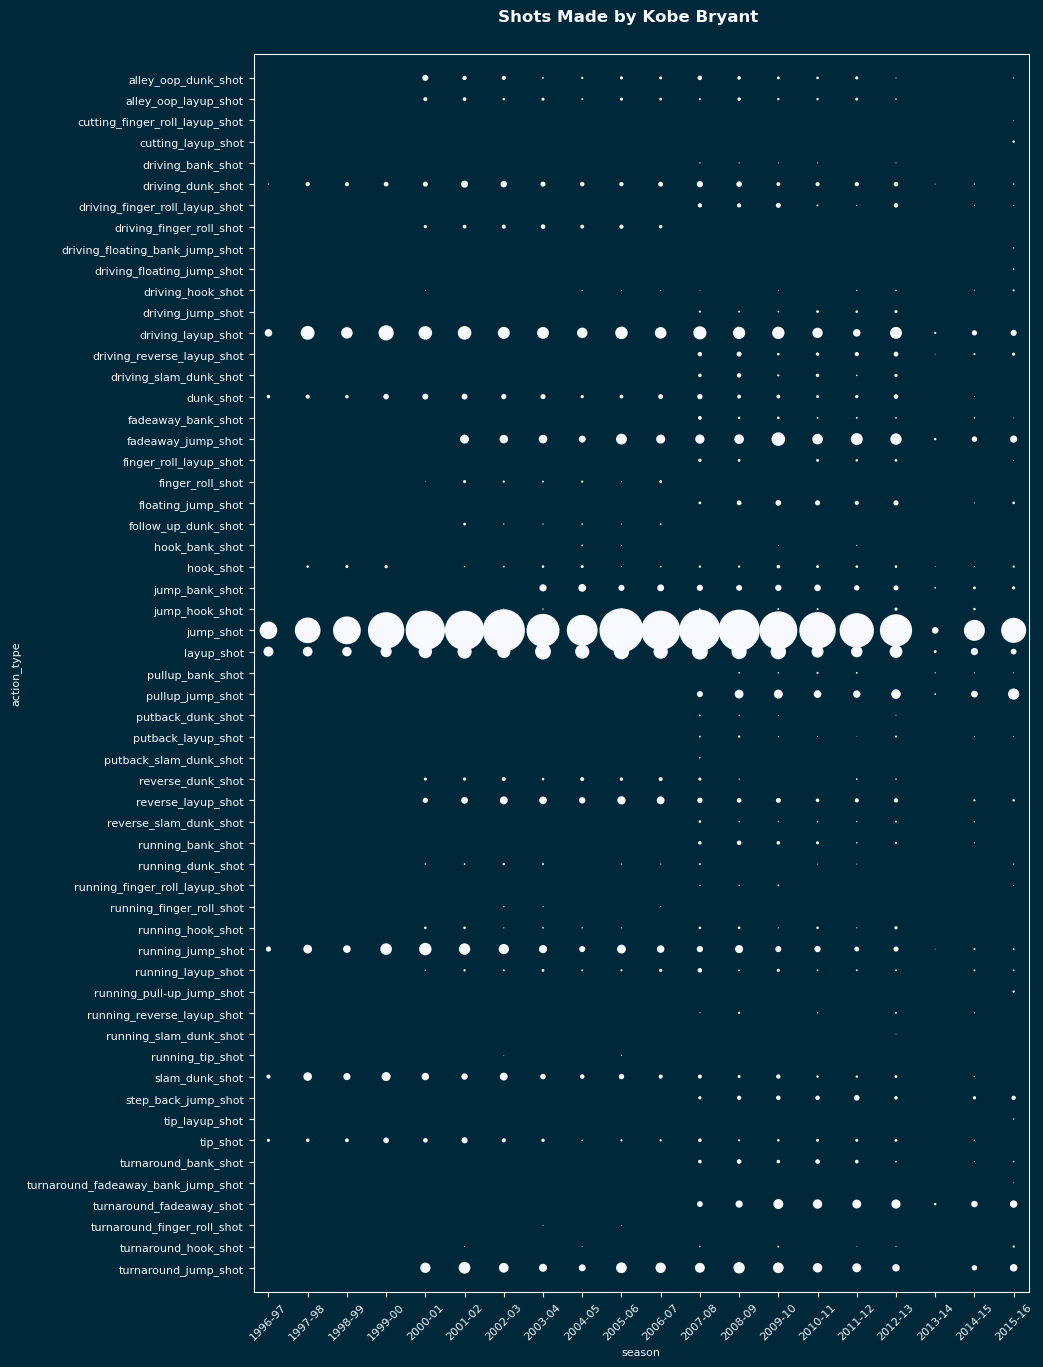

In [37]:
fig, ax = plt.subplots(figsize=(10,15))
fig.suptitle('Shots Made by Kobe Bryant')
sns.scatterplot(data=df_action_type_season_reshape, x='season', y='action_type', size='value', ax=ax, sizes=(0,1000), color='ghostwhite')
plt.subplots_adjust(top=0.95)
ax.get_legend().remove()
ax.tick_params(axis='x', labelrotation = 45)
ax.margins(0.02)
format_fig(fig, "NoFormatting")
fig.set_dpi(100)
fig.savefig('../imgs/Shots_Made_by_Kobe_Bryant.png', dpi=400, bbox_inches='tight')

In [38]:
df_action_type_season.sum().sum()

11465.000000000644

In [39]:
combined_shot_types = cols_dict['COMBINED_SHOT_TYPE']
combined_shot_types

{'bank_shot': [''],
 'dunk': [''],
 'hook_shot': [''],
 'jump_shot': [''],
 'layup': [''],
 'tip_shot': ['']}

In [40]:
#creating empty dataframe of how many shots of a particular action types were made for each season kobe played
df_combined_shot_type_season = pd.DataFrame(index=seasons_played, columns=combined_shot_types)
df_combined_shot_type_season

,bank_shot,dunk,hook_shot,jump_shot,layup,tip_shot
1996-97,NaN,NaN,NaN,NaN,NaN,NaN
1997-98,NaN,NaN,NaN,NaN,NaN,NaN
1998-99,NaN,NaN,NaN,NaN,NaN,NaN
1999-00,NaN,NaN,NaN,NaN,NaN,NaN
2000-01,NaN,NaN,NaN,NaN,NaN,NaN
2001-02,NaN,NaN,NaN,NaN,NaN,NaN
2002-03,NaN,NaN,NaN,NaN,NaN,NaN
2003-04,NaN,NaN,NaN,NaN,NaN,NaN
2004-05,NaN,NaN,NaN,NaN,NaN,NaN
2005-06,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
mask_combined_shot_type = [x for x in df.columns if re.search('COMBINED_SHOT_TYPE', x)]
mask_combined_shot_type

['COMBINED_SHOT_TYPE:bank_shot',
 'COMBINED_SHOT_TYPE:dunk',
 'COMBINED_SHOT_TYPE:hook_shot',
 'COMBINED_SHOT_TYPE:jump_shot',
 'COMBINED_SHOT_TYPE:layup',
 'COMBINED_SHOT_TYPE:tip_shot']

In [42]:
for season in seasons_played:
    mask = df[df['SEASON:'+season]==1].index
    df_combined_shot_type_season.loc[season,:] = list(df.loc[mask, mask_combined_shot_type].agg(np.sum, axis=0))
df_combined_shot_type_season

,bank_shot,dunk,hook_shot,jump_shot,layup,tip_shot
1996-97,0.0,23.0,0.0,302.0,144.0,7.0
1997-98,0.0,83.0,5.0,649.0,240.0,12.0
1998-99,0.0,63.0,7.0,667.0,173.0,11.0
1999-00,0.0,98.0,8.0,1169.0,273.0,29.0
2000-01,0.0,121.0,6.0,1403.0,320.0,18.0
2001-02,0.0,120.0,9.0,1496.0,376.0,27.0
2002-03,0.0,136.0,4.0,1740.0,346.0,15.0
2003-04,0.0,74.0,9.0,1133.0,409.0,13.0
2004-05,2.0,60.0,12.0,947.0,301.0,2.0
2005-06,1.0,66.0,3.0,1838.0,405.0,5.0


In [43]:
#The total number of shots kobe took during his career (made+missed)
df_combined_shot_type_season.sum().sum()

30696.0

In [44]:
# shots made by kobe during his career
df['SHOTS_MADE'].sum()

11465.0

In [45]:
df_combined_shot_type_season_reshape = (df_combined_shot_type_season.rename_axis('season')
            .reset_index()
            .melt(id_vars=['season'], var_name='combined_shot_type'))


df_combined_shot_type_season_reshape

,season,combined_shot_type,value
0,1996-97,bank_shot,0.0
1,1997-98,bank_shot,0.0
2,1998-99,bank_shot,0.0
3,1999-00,bank_shot,0.0
4,2000-01,bank_shot,0.0
...,...,...,...
115,2011-12,tip_shot,7.0
116,2012-13,tip_shot,7.0
117,2013-14,tip_shot,0.0
118,2014-15,tip_shot,2.0


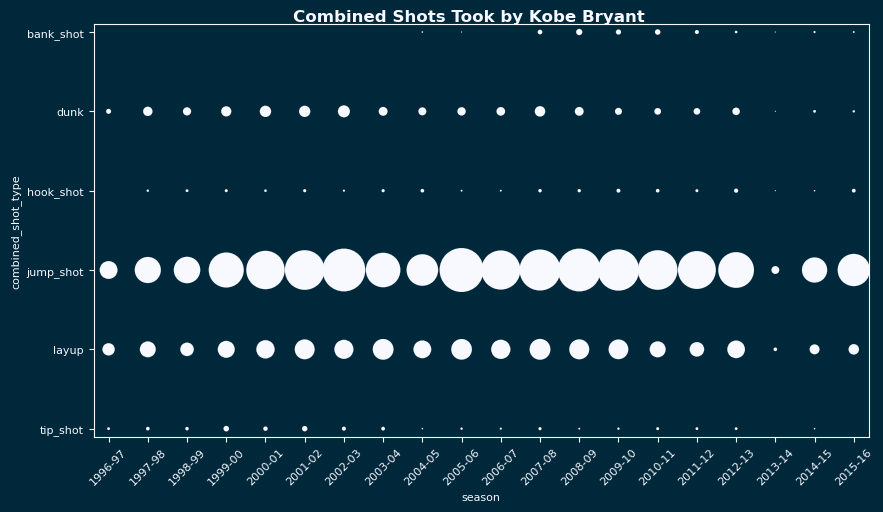

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Combined Shots Took by Kobe Bryant')
sns.scatterplot(data=df_combined_shot_type_season_reshape, x='season', y='combined_shot_type', size='value', ax=ax, sizes=(0,1000), color='ghostwhite')
plt.subplots_adjust(top=0.95)
ax.get_legend().remove()
ax.tick_params(axis='x', labelrotation = 45)
ax.margins(0.02)
format_fig(fig, "NoFormatting")
fig.set_dpi(100)
fig.savefig('../imgs/Combined_Shots_Took_by_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

In [47]:
def kobe_shots_plot(shot_cat, df, fig):
    ls_shot_cat = cols_dict[shot_cat]
    df_shot_cat = pd.DataFrame(index=seasons_played, columns=ls_shot_cat)
    mask_shot_cat = [x for x in df.columns if re.search(rf'^{shot_cat}', x)]
    for season in seasons_played:
        mask = df[df['SEASON:'+season]==1].index
        df_shot_cat.loc[season,:] = list(df.loc[mask, mask_shot_cat].agg(np.sum, axis=0))
    print(f'The value counts for each category is:')
    print(df_shot_cat.sum())
    print(f'The total number of shots are:{df_shot_cat.sum().sum()}')
    #print(df_shot_cat.sum().sum())
    df_shot_cat_reshape = (df_shot_cat.rename_axis('season')
            .reset_index()
            .melt(id_vars=['season'], var_name=shot_cat))
    
    #fig, ax = plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df_shot_cat_reshape, x='season', y=shot_cat, size='value', ax=ax, sizes=(0,1000), color='ghostwhite')
    ax.get_legend().remove()
    ax.tick_params(axis='x', labelrotation = 45)
    format_fig(fig, "NoFormatting")

The value counts for each category is:
16-24_ft           8315.0
24                 6275.0
8-16_ft            6626.0
back_court_shot      83.0
less_than_8_ft     9397.0
dtype: object
The total number of shots are:30696.0


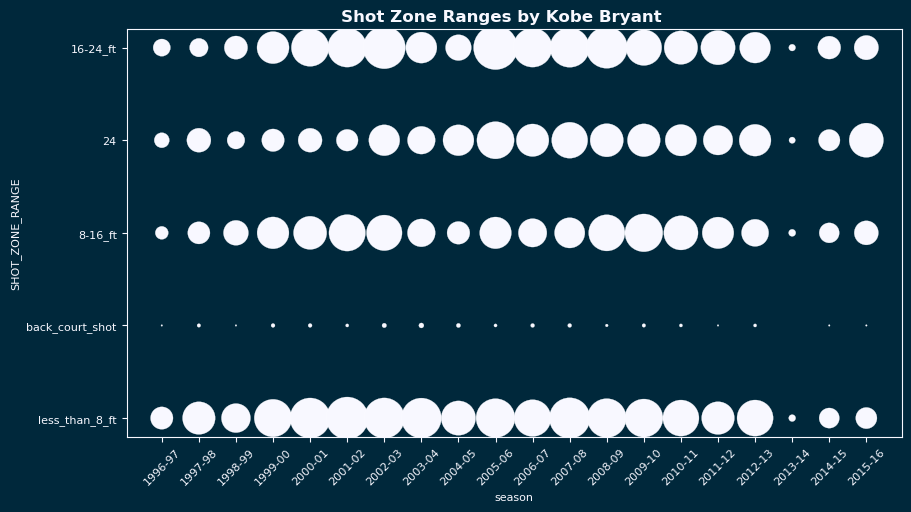

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle(f'Shot Zone Ranges by Kobe Bryant')
kobe_shots_plot('SHOT_ZONE_RANGE', df, fig)
fig.set_dpi(100)
ax.margins(0.05)
plt.subplots_adjust(top=0.94)
fig.savefig(f'../imgs/Shot_Zone_Range_Took_by_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

The value counts for each category is:
above_the_break_3     5620.0
backcourt               71.0
in_the_paint_         4578.0
left_corner_3          280.0
mid-range            12625.0
restricted_area       7135.0
right_corner_3         387.0
dtype: object
The total number of shots are:30696.0


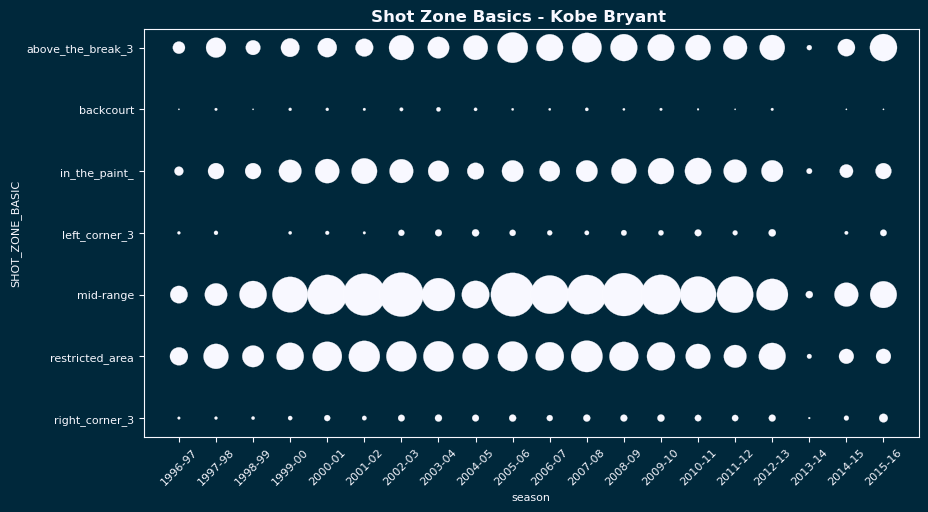

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle(f'Shot Zone Basics - Kobe Bryant')
kobe_shots_plot('SHOT_ZONE_BASIC', df, fig)
fig.set_dpi(100)
ax.margins(0.05)
plt.subplots_adjust(top=0.94)
fig.savefig(f'../imgs/Shot_Zone_Basic_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

The value counts for each category is:
back_court              83.0
center               13454.0
left_side_center      4044.0
left_side             3751.0
right_side_center     4776.0
right_side            4588.0
dtype: object
The total number of shots are:30696.0


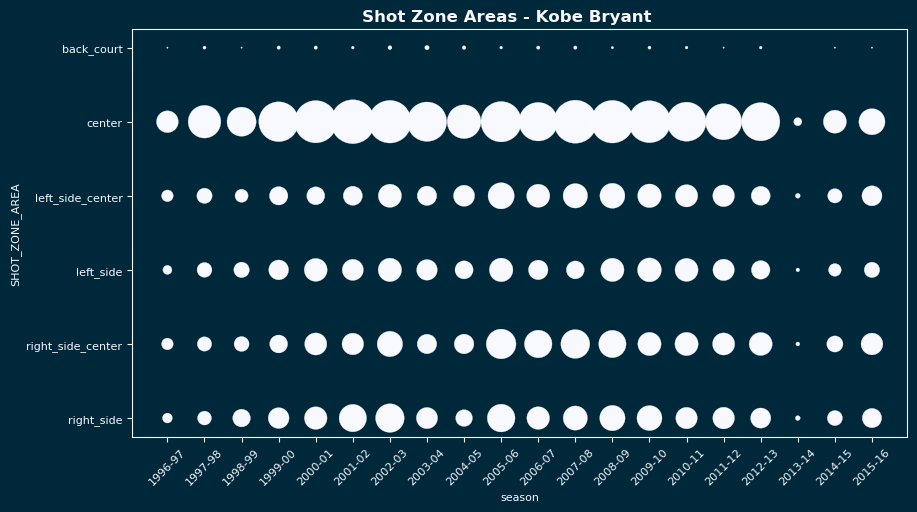

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle(f'Shot Zone Areas - Kobe Bryant')
kobe_shots_plot('SHOT_ZONE_AREA', df, fig)
fig.set_dpi(100)
ax.margins(0.05)
plt.subplots_adjust(top=0.94)
fig.savefig(f'../imgs/Shot_Zone_Area_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

The value counts for each category is:
2pt_field_goal    24270.0
3pt_field_goal     6426.0
dtype: object
The total number of shots are:30696.0


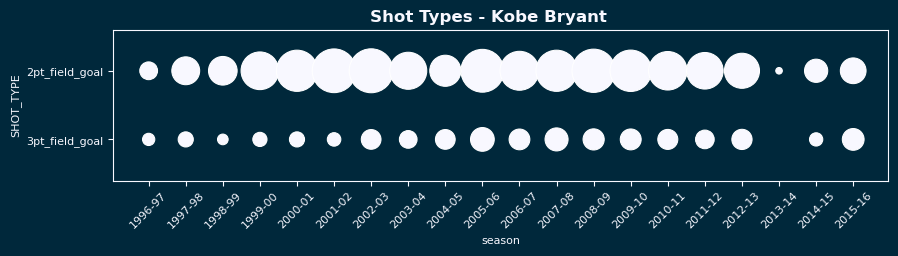

In [51]:
fig, ax = plt.subplots(figsize=(10,2))
fig.suptitle(f'Shot Types - Kobe Bryant')
kobe_shots_plot('SHOT_TYPE', df, fig)
fig.set_dpi(100)
ax.set_ymargin(0.6)
plt.subplots_adjust(top=0.88)
fig.savefig(f'../imgs/Shot_Type_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

## What type of Shot Types did Kobe take over the span of his career?

The value counts for each category is:
bank_shot      141.0
dunk          1286.0
hook_shot      153.0
jump_shot    23485.0
layup         5447.0
tip_shot       184.0
dtype: object
The total number of shots are:30696.0


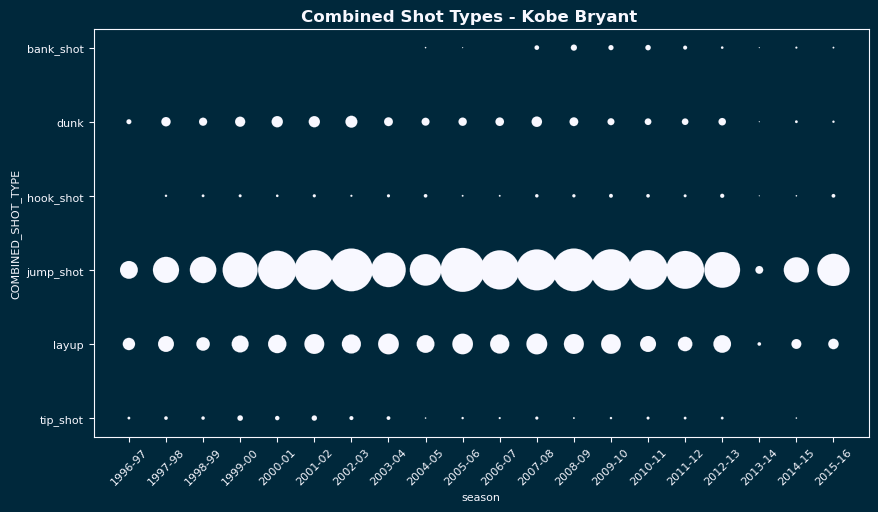

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle(f'Combined Shot Types - Kobe Bryant')
kobe_shots_plot('COMBINED_SHOT_TYPE', df, fig)
fig.set_dpi(100)
ax.margins(0.05)
plt.subplots_adjust(top=0.94)
fig.savefig(f'../imgs/Combined_Shot_Type_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

## How many games did Kobe played every season and the total number of games played in a given season?

In [53]:
mask_seasons_cols = [x for x in df.columns if re.search(rf'^SEASON:', x)]
mask_seasons_cols

['SEASON:1996-97',
 'SEASON:1997-98',
 'SEASON:1998-99',
 'SEASON:1999-00',
 'SEASON:2000-01',
 'SEASON:2001-02',
 'SEASON:2002-03',
 'SEASON:2003-04',
 'SEASON:2004-05',
 'SEASON:2005-06',
 'SEASON:2006-07',
 'SEASON:2007-08',
 'SEASON:2008-09',
 'SEASON:2009-10',
 'SEASON:2010-11',
 'SEASON:2011-12',
 'SEASON:2012-13',
 'SEASON:2013-14',
 'SEASON:2014-15',
 'SEASON:2015-16']

In [54]:
df_games_per_season = df[mask_seasons_cols]
df_games_per_season.columns = seasons_played
df_games_per_season

,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df_games_per_season = df_games_per_season.applymap(lambda x: 1 if x == 1 else np.NAN)

In [56]:
df_games_total_season = df[mask_seasons_cols].agg(np.sum, axis=0)
df_games_total_season.index = seasons_played
df_games_total_season = df_games_total_season.to_frame()
df_games_total_season

,0
1996-97,74.0
1997-98,89.0
1998-99,58.0
1999-00,88.0
2000-01,84.0
2001-02,99.0
2002-03,94.0
2003-04,86.0
2004-05,66.0
2005-06,87.0


findfont: Font family ['Cambira'] not found. Falling back to DejaVu Sans.


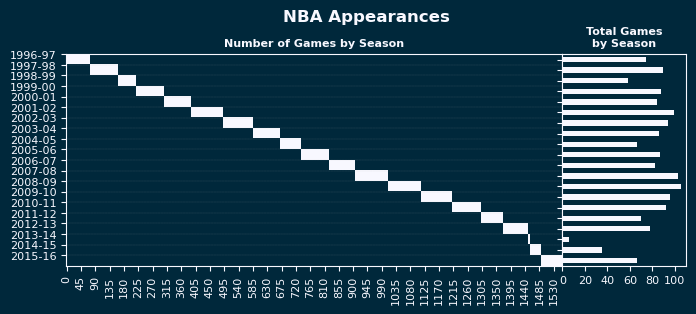

In [57]:
#pink-red color represents non-appearance
fig = plt.figure(figsize=(8,3))
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
ax = plt.subplot2grid((1,5),(0,0),colspan = 4, fig=fig)
fig.suptitle('NBA Appearances')
sns.heatmap(df_games_per_season.isna().T, cmap=['ghostwhite', '#00283b'], cbar=False, ax=ax)
ax.yaxis.set_major_locator(FixedLocator(range(len(df_games_per_season.columns))))
ax.set_yticklabels(list(df_games_per_season.columns))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_title('Number of Games by Season')
#ax.yaxis.set_major_locator(list(df_games_per_season.index))

ax2 = plt.subplot2grid((1,5),(0,4),colspan = 1, fig=fig)
ax2.set_title('Total Games\nby Season')
ax2.yaxis.set_major_locator(FixedLocator(range(len(df_games_per_season.columns))))
ax2.xaxis.set_major_locator(FixedLocator([0,20,40,60,80,100]))
ax2.grid(which='major', axis='y', linestyle = '--', linewidth = 0.1)
df_games_total_season.plot.barh(ax=ax2, color='ghostwhite')
ax2.get_legend().remove()
plt.gca().invert_yaxis()
plt.setp(ax2.get_yticklabels(), visible=False)
format_fig(fig, "NoFormatting")
fig.set_dpi(100)
plt.subplots_adjust(top=0.83, wspace=0)
ax.grid(which='major', axis='y', linestyle = '--', linewidth = 0.1)
ax.set_title(ax.get_title(), fontsize=8, fontweight = 'extra bold', fontfamily = 'Cambira', color = 'ghostwhite')
ax2.set_title(ax2.get_title(), fontsize=8, fontweight = 'extra bold', fontfamily = 'Cambira', color = 'ghostwhite')
fig.savefig('../imgs/NBA_Appearances_Every_Season_Kobe_Bryant.png', dpi=200, bbox_inches='tight')

## Which city did Kobe scored the most points?

In [58]:
shot_cat = 'SHOT_TYPE'
mask_shot_cat = [x for x in df.columns if re.search(rf'^{shot_cat}', x)]

ls_opponent = []
dict_opp_shots = dict()
for col in cols:
    m = re.search(r'([A-Z_]+)\:([a-z]+)\:([0-9-]+)', col)
    if m:
        ls_opponent.append(m.group(2))
ls_opponent = sorted(list(set(ls_opponent)))

for col in ls_opponent:
    mask_cols = df.columns.map(lambda x: bool(re.search(col, x)))
    mask_cols = df.loc[:,mask_cols].columns
    mask_index = (df.loc[(df[mask_cols].values==1).any(1)].index)
    shots_made = df.loc[mask_index,'SHOTS_MADE'].sum()
    total_shots = df.loc[mask_index, mask_shot_cat].agg(np.sum, axis=0).sum()
    total_games = df[mask_cols].sum().sum().astype(int)
    dict_opp_shots[col] = [shots_made, total_shots, total_games]
    #dict_opp_shots[col] = df.loc[mask_index,'SHOTS_MADE'].sum()
    #print(df.loc[mask_index, mask_shot_cat].agg(np.sum, axis=0).sum())

df_opp_shots = pd.DataFrame.from_dict(data=dict_opp_shots, orient='index', columns=['Shot_Made', 'Total_Shots', 'Total_Games'])
df_opp_shots.index = [nba_teams[val.upper()] for val in df_opp_shots.index]
df_opp_shots['Percent'] = (df_opp_shots['Shot_Made']*100/df_opp_shots['Total_Shots']).astype(int)
df_opp_shots
#print (df_opp_shots)
    

,Shot_Made,Total_Shots,Total_Games,Percent
Atlanta Hawks,198.0,519.0,29,38
Brooklyn Nets,18.0,55.0,3,32
Boston Celtics,322.0,946.0,44,34
Charlotte Hornets,218.0,620.0,31,35
Chicago Bulls,222.0,610.0,31,36
Cleveland Cavaliers,226.0,619.0,34,36
Dallas Mavericks,469.0,1199.0,64,39
Denver Nuggets,619.0,1642.0,83,37
Detroit Pistons,259.0,715.0,38,36
Golden State Warriors,531.0,1356.0,67,39


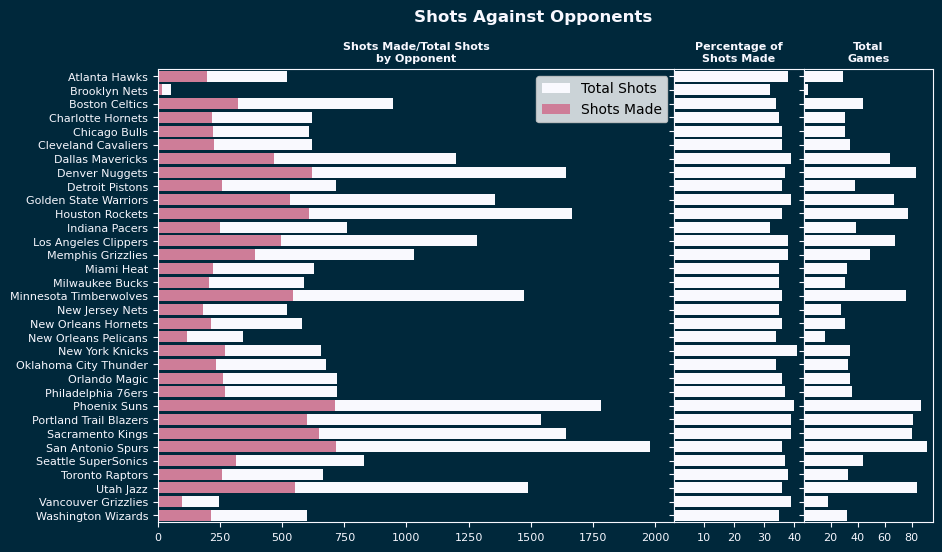

In [59]:
#pink-red color represents non-appearance
fig = plt.figure(figsize=(10,6))
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
ax = plt.subplot2grid((1,6),(0,0),colspan = 4, fig=fig)
fig.suptitle('Shots Against Opponents')
sns.barplot(y=df_opp_shots.index, x=df_opp_shots['Total_Shots'].values, orient='h', ax = ax, color='ghostwhite', label='Total Shots')
sns.barplot(y=df_opp_shots.index, x=df_opp_shots['Shot_Made'].values, orient='h', ax = ax, color='palevioletred', label='Shots Made')
#ax.yaxis.set_major_locator(FixedLocator(range(len(df_games_per_season.columns))))
#ax.set_yticklabels(list(df_games_per_season.columns))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_title('Shots Made/Total Shots\nby Opponent')
ax.legend()
#ax.yaxis.set_major_locator(list(df_games_per_season.index))

ax2 = plt.subplot2grid((1,6),(0,4),colspan = 1, fig=fig)
ax2.set_title('Percentage of\nShots Made')
ax2.xaxis.set_major_locator(FixedLocator([10,20,30,40,50]))
ax2.grid(which='major', axis='y', linestyle = '--', linewidth = 0.1)
sns.barplot(y=df_opp_shots.index, x=df_opp_shots['Percent'].values, orient='h', ax = ax2, color='ghostwhite')
#ax2.get_legend().remove()
#plt.gca().invert_yaxis()
plt.setp(ax2.get_yticklabels(), visible=False)
fig.set_dpi(100)
plt.subplots_adjust(top=0.88, wspace=0)

ax3 = plt.subplot2grid((1,6),(0,5),colspan = 1, fig=fig)
ax3.set_title('Total\nGames')
ax3.xaxis.set_major_locator(FixedLocator([20,40,60,80,100]))
ax3.grid(which='major', axis='y', linestyle = '--', linewidth = 0.1)
sns.barplot(y=df_opp_shots.index, x=df_opp_shots['Total_Games'].values, orient='h', ax = ax3, color='ghostwhite')
#ax3.get_legend().remove()
#plt.gca().invert_yaxis()
plt.setp(ax3.get_yticklabels(), visible=False)
format_fig(fig, "NoFormatting")
fig.set_dpi(100)
plt.subplots_adjust(top=0.88, wspace=0)
ax3.set_title(ax3.get_title(), fontsize=8, fontweight = 'extra bold', fontfamily = 'Cambira', color = 'ghostwhite')
ax2.set_title(ax2.get_title(), fontsize=8, fontweight = 'extra bold', fontfamily = 'Cambira', color = 'ghostwhite')
ax.set_title(ax.get_title(), fontsize=8, fontweight = 'extra bold', fontfamily = 'Cambira', color = 'ghostwhite')


fig.savefig('../imgs/Shots_by_Opponent.png', dpi=200, bbox_inches='tight')

In [60]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'stat_func'
  cset = contour_func(


Text(0.5, 1.2, 'Shots Taken by Kobe Bryant')

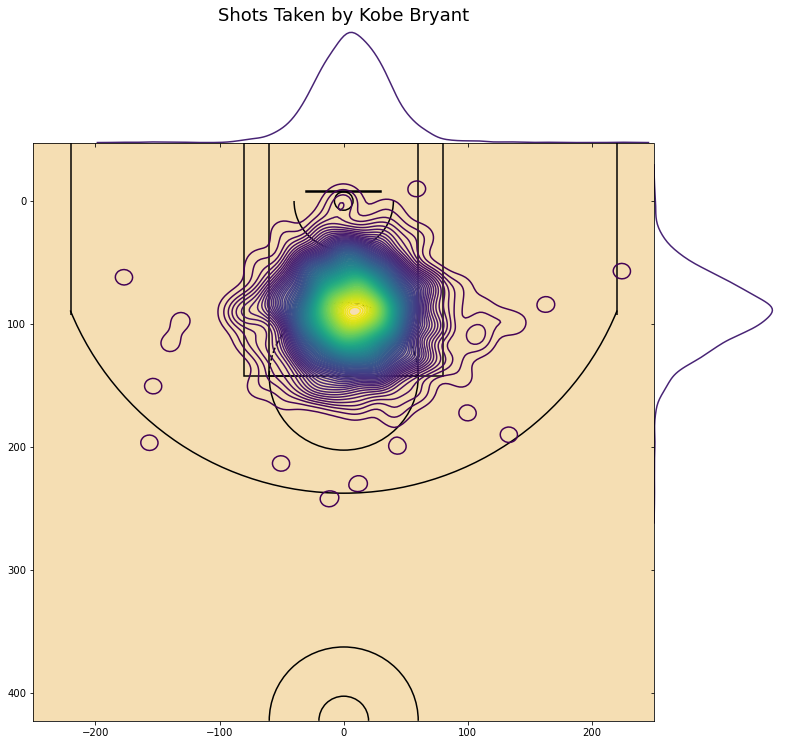

In [61]:
#source: http://savvastjortjoglou.com/nba-shot-sharts.html

# import the object that contains the viridis colormap
##from option_d import test_cm as viridis

# Register and set Viridis as the colormap for the plot
#plt.register_cmap(cmap=viridis)
#cmap = plt.get_cmap(cmaps[0][1][0])
cmap=plt.cm.viridis

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(data=df, x='MEAN_X_POSITION', y='MEAN_Y_POSITION', stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=100, thresh=0)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint, 
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
ax.set_facecolor('wheat')
draw_court(ax, color="black", lw=1.5)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Shots Taken by Kobe Bryant', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
#ax.text(-250,445,'Data Source: stats.nba.com'
#        '\nAuthor: Savvas Tjortjoglou', fontsize=12)
